# $\Sigma^+$ reconstruction

In [199]:
from root_pandas import read_root
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pdg
import seaborn as sns

In [200]:
plt.rc('figure', figsize = (8, 6))
plt.rc('font', size = 13)
plt.rc('hist', bins = 200)

In [201]:
root_file = '../data/sigma_ipconstraint_only.root'
#columns = ['M', 'pi0_M', 'isSignal', 'p_d0', 'p_z0', 'pi0_p', 'p', 'dr', 'dz', 'pi0_isSignal', 'chiProb']
sigma = read_root(root_file, 'sigma')

In [202]:
sigma.head()

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,M,ErrM,px,py,...,pi0_cosaXY,pi0_isSignal,pi0_isPrimarySignal,pi0_mcErrors,pi0_mcPDG,pi0_genMotherID,pi0_genMotherP,pi0_genMotherPDG,pi0_genParticleID,pi0_nMCMatches
0,55,7,5,0,2,1.0,1.160894,0.005906,-0.074190,-0.367688,...,-0.154270,0.0,0.0,314.0,521.0,0.0,4.493528,300553.0,1.0,1.0
1,55,7,5,1,2,1.0,1.214163,0.004925,0.140547,-0.232167,...,-0.626118,0.0,0.0,314.0,-20423.0,1.0,2.204960,521.0,3.0,1.0
2,55,7,12,0,11,1.0,1.173191,0.004075,-0.047953,-0.503534,...,0.999997,0.0,0.0,512.0,0.0,0.0,0.000000,0.0,-1.0,0.0
3,55,7,12,1,11,1.0,1.181076,0.003040,-0.029280,-0.556195,...,0.917236,0.0,0.0,498.0,300553.0,0.0,0.000000,0.0,0.0,1.0
4,55,7,12,2,11,1.0,1.234971,0.003399,0.016056,-0.490211,...,0.819244,0.0,0.0,498.0,300553.0,0.0,0.000000,0.0,0.0,1.0


In [203]:
len(sigma)

5760542

In [204]:
unique_events = sigma[['__experiment__', '__run__', '__event__']].drop_duplicates()
unique_events.head()

,__experiment__,__run__,__event__
0,55,7,5
2,55,7,12
13,55,7,14
14,55,7,13
15,55,7,19


In [205]:
len(unique_events)

1096565

In [206]:
sigma.iloc[unique_events.index].__ncandidates__.describe()

count    1.096565e+06
mean     4.319629e+00
std      4.290834e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      1.450000e+02
Name: __ncandidates__, dtype: float64

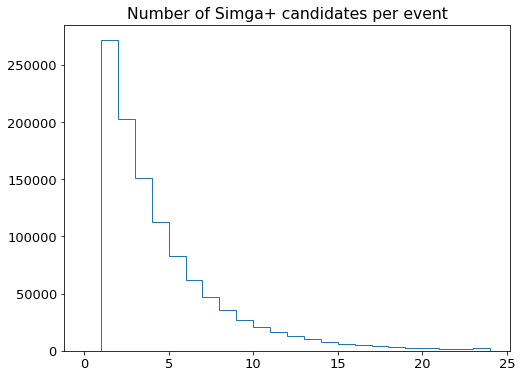

In [207]:
plt.hist(sigma.iloc[unique_events.index].__ncandidates__, bins = range(0, 25), histtype = 'step')
plt.title('Number of Simga+ candidates per event')
plt.show()

## $\Sigma^+$ and $\pi^0$ mass distribution

In [208]:
pdg.get('Sigma+')

<Particle "Sigma+" mass=1.18937 width=0 charge=1 pdg=3222>

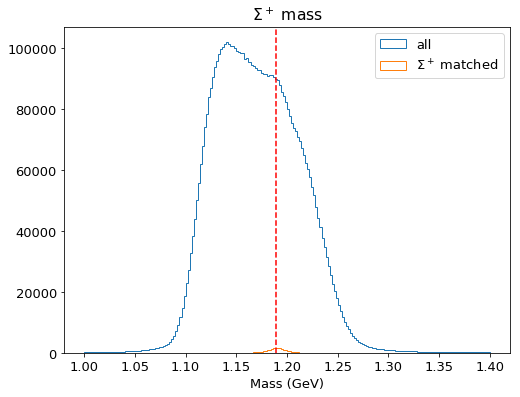

In [221]:
plt.hist(sigma.M, range = [1, 1.4], histtype = 'step', label = 'all')
plt.hist(sigma[sigma.isSignal == 1].M, range = [1, 1.4], histtype = 'step', label = '$\Sigma^+$ matched')
plt.axvline(x = 1.18937, color = 'red', linestyle = '--')
plt.legend()
plt.xlabel('Mass (GeV)')
plt.title('$\Sigma^+$ mass')
plt.show()

In [210]:
pdg.get('pi0')

<Particle "pi0" mass=0.134977 width=0 charge=0 pdg=111>

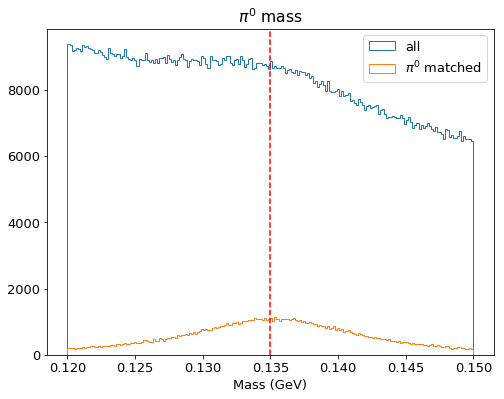

In [220]:
plt.hist(sigma.pi0_M, range = [.12, .15], histtype = 'step', label = 'all')
plt.hist(sigma[sigma.pi0_isSignal == 1].pi0_M, range = [.12, .15], histtype = 'step', label = '$\pi^0$ matched')
plt.axvline(x = 0.134977, color = 'red', linestyle = '--')
plt.legend()
plt.xlabel('Mass (GeV)')
plt.title('$\pi^0$ mass')
plt.show()

## Vertex position of $\Sigma^+$

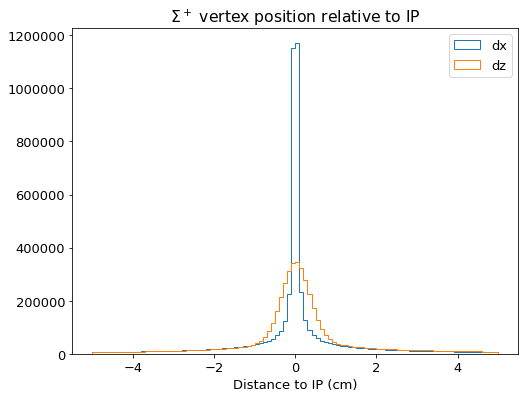

In [212]:
plt.hist(sigma.x - sigma.IPX, bins = 100, range = [-5, 5], histtype = 'step', label = 'dx')
plt.hist(sigma.z - sigma.IPZ, bins = 100, range = [-5, 5], histtype = 'step', label = 'dz')
plt.title('$\Sigma^+$ vertex position relative to IP')
plt.xlabel('Distance to IP (cm)')
plt.legend()
plt.show()

## Vertex position of $\pi^0$

The vertex positions of $\pi^0$ and $\Sigma^+$ are the same as expected.

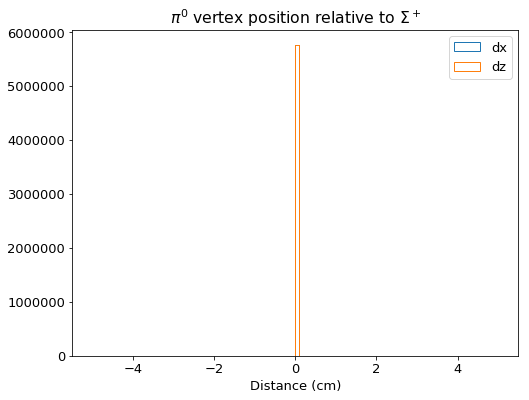

In [213]:
plt.hist(sigma.pi0_x - sigma.x, bins = 100, range = [-5, 5], histtype = 'step', label = 'dx')
plt.hist(sigma.pi0_z - sigma.z, bins = 100, range = [-5, 5], histtype = 'step', label = 'dz')
plt.title('$\pi^0$ vertex position relative to $\Sigma^+$')
plt.xlabel('Distance (cm)')
plt.legend()
plt.show()

## What are the particles reconstructed as $\Sigma^+$?

In [214]:
def pdg_to_names(plist):
    import pdg
    name_list = []
    for part in plist:
        try:
            name_list += [pdg.to_name(part)]
        except:
            name_list += ['PDG = %d' % part]
    return name_list

def plot_particle_names(df, title = ''):
    df = df.value_counts().nlargest(20)
    df.index = pdg_to_names(df.index.astype('int'))
    df.plot('barh', log = True, figsize = (8, 8))
    plt.title(title)

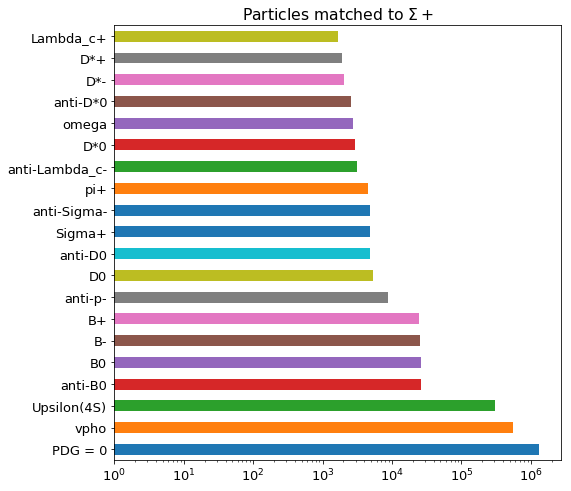

In [215]:
plot_particle_names(sigma[sigma.distance > 2].mcPDG, 'Particles matched to $\Sigma+$')

In [216]:
pdg.get('Upsilon(4S)')

<Particle "Upsilon(4S)" mass=10.5794 width=0.0205 charge=0 pdg=300553>